### CDS NYU
### DS-GA 3001 | Reinforcement Learning
### Lab 01
### January 30, 2025


# Introduction to OpenAI Gym (Gymnasium)

<br>

---

## Section Leader


Akshitha Kumbam – ak11071@nyu.edu

Kushagra Khatwani – kk5395@nyu.edu


## Goal of Today's Lab

In this Lab, we will build "environments" in Gym to understand the key components involved when working with Gym. We will not implement any RL "agent" today so we can first focus on building RL interfaces in Gym, and interacting with Gym environments.

In the rest of the course and all future labs, we will explore the many different ways for an RL agent to explore an environment, learn, and exploit its learning to make decisions. For today, let's just get comfortable setting up Gym simulation environments.

## Resources

* Gym: https://www.gymlibrary.dev/ and its wiki https://github.com/openai/gym/wiki
* The original paper from OpenAI when Gym was released in 2016: https://arxiv.org/pdf/1606.01540.pdf
* In late 2022, Gym was moved to a new platform called Gymnasium, which is now **the only maintained version of Gym**: https://gymnasium.farama.org/

<br>

---

# 1. Install libraries to set up RL environments in Gym

#### At the minimum, you need to create a virtual environment with Python and OpenAI Gym installed:

`conda create --name py39 python=3.9`

`conda activate py39`

`pip install gym`

`pip install gymnasium`

To add the virtual env as kernel in Jupyter Notebook:

`pip install ipykernel`

`python -m ipykernel install --user --name=py39`


#### Other libraries will soon be needed as the course progresses:


* Install **extended Gym packages** (e.g., Atari games, etc): `pip install gym-all` or `conda install -c conda-forge gym-all`

If you face issues installing gym-all, no need to worry as you can still install the required packages separately using the steps below and that should suffice:

* Install the **Arcade Learning Environment**: `pip install ale-py`

* Install **swig**:
`pip install swig`
* Install **box2d**:
`pip install gym-box2d` or `conda install -c conda-forge gym-box2d`

* Install **pygame**: `pip install pygame`


* Install **tensorflow**:
`pip install tensorflow` or `conda install -c conda-forge tensorflow`


* Install **keras-rl2**:
`pip install keras-rl2`

# 2. Build Reinforcement Learning environments in Gym

In this section, we will build Reinforcement Learning environments in Gym to understand the key components involved when working with Gym. For today as RL "agent", we will use random action (random behavior), so we can focus just on the overall logic and Python commands when building RL interfaces in Gym and interacting with Gym environments.

In the rest of the course and all future labs, we will explore the many different ways for an RL agent to explore an environment, learn, and exploit its learning to make decisions. For today, let's just get comfortable setting up Gym simulation environments.

## 2.1) Build an Atari RL simulation environment: *Breakout video game*

Gym is a toolkit for developing and comparing reinforcement learning (RL) algorithms. It offers pre-built, baseline RL environments within which a developer can build and test RL algorithms.

**At the most fundamental level, using the Gym library means 1) selecting an environment, and 2) interacting with it:**

1. **Gym offers many different environments to select, from classic control use cases (Pendulum, Cart-Pole, Blackjack, etc) to video games (Atari) and simulated robotics (MuJoCo)**. These use cases were selected by OpenAI in 2016 to represent problems that are tractable using existing (21st century) AI technologies, yet complex enough to showcase the need for human-like intelligence.


2. **Gym offers Python functions to interact with the created environment**. Most important ones are:
    * `reset()`: Resets the state of the environment to the initial state (i.e., it restarts the game)
    * `step(action)`:  Step forward by performing an action on the environment and returning the resulting state and reward after taking that action, a flag indicating if the game is over or not, and some metadata information
    
The `reset` function returns one value, which is a starting state/observation.

The `step` function returns four values, which we will call the ``next_state``, ``reward``,  ``done`` and ``info`` variables.

-  ``next_state``: This is the observation that the agent will receive
   after taking the action.
-  ``reward``: This is the reward that the agent will receive after
   taking the action.
-  ``done``: This is a boolean variable that indicates whether or
   not the environment has terminated.
-  ``info``: This is a dictionary that might contain additional
   information about the environment.

In the Atari environments the ``info`` dictionary has a ``ale.lives`` key that tells us how many lives the
agent has left. If the agent has 0 lives, then the episode is over.


### Here are the most basic Python commands to implement a Gym environments:

A concise doc for the Atari Breakout video game available in Gym can be found here: https://gym.openai.com/envs/Breakout-v0/

Note these basic commands are identical for all environments in Gym.


**WARNING: Graphical rendering often crashes the Python kernel after completion => If this happens don't worry about it, just restart your kernel.** <br> (click on `Kernel`, then `Restart`)

In [1]:
import gymnasium as gym
import ale_py

gym.register_envs(ale_py) #This will register atari environments  in gymnasium


env = gym.make("Breakout-v0", render_mode="human") # Exact name/version of environments can be found in Gym's doc
observation = env.reset()
for _ in range(500):
    action = env.action_space.sample()  # this is where an actor (RL agent) would be inserted
    observation, reward, terminated, truncated, info = env.step(action)
    if terminated or truncated:
        observation = env.reset()
env.close()

NameNotFound: Environment `Breakout` doesn't exist.

**Warning:** The `render_mode="human"` argument renders the environment graphically in a separate window. It is optional, and not always recommended. It is not a good idea to use it when *training* an agent because rendering slows down training a lot. But when looking at an environment for the first time, or when training is complete, it can of course be useful to graphically vizualize how the agent behaves in the environment. But here is the warning: in Jupyter Notebook the Gym's graphical rendering works well but is likely to crash your kernel (or freeze it) once the simulation is complete. So as a habit, be ready to click on `Interrupt` and `Restart` in the Kernel tab of Jupyter Notebook after you run a simulation rendered graphically.

### Play interactively with Atari video games in Gym

Gym comes with a handy `utils` function called `play` for Atari games.

Start the game by firing the ball with `space`, then move left and right with `a` and `d` on your keyboard.

How many points can you score?

In [2]:
import gymnasium as gym
from gymnasium.utils.play import play  # Import the play module from gym.utils
import ale_py

gym.register_envs(ale_py) #This will register atari environments  in gymnasium

#Read the docs to decide the appropriate render mode for the environment. Edit the line below.
env = gym.make("Breakout-v0", render_mode = "rgb_array")    # Don't use render_mode='human' because this will open 2 windows when invoking the
                                 # method play below, and this redundancy can make your keyboard unresponsive

keys_to_action = {
    "a": 3,  # Move left
    "d": 2,  # Move right
    "s": 1,  # Fire the ball
}

play(env, zoom=2, keys_to_action=keys_to_action)                # Details of the 'play' function are here: https://gymnasium.farama.org/api/utils/

NameNotFound: Environment `Breakout` doesn't exist.

### Useful command to interact with a Gym environment

Let's look at some frequently used attributes and methods of a Gym environment, please checkout the concise doc here: https://gymnasium.farama.org/api/env/

`render_mode` takes one argument which can take two possible values:
* "human": Graphically render the state of the environment and display it on a laptop screen
* "rgb_array": Returns an array of pixels containing the state (image) of the current environment

`env.action_space` provides information on the action space, in particular `env.action_space.n` returns the number of possible actions

`env.observation_space` provides information on the state space, in particular `env.observation_space.n` returns the number of states


Color of the pixel at (60,50): [200  72  72]


f:\Study_Notes_Backup\Data_Science\DS-GA-3001-Reinforcement\.venv\lib\site-packages\gymnasium\envs\registration.py:517: DeprecationWarning: WARN: The environment Breakout-v0 is out of date. You should consider upgrading to version `v4`.
  logger.deprecation(


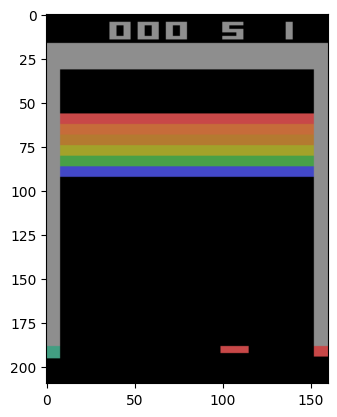

In [1]:
import gymnasium as gym
import matplotlib.pyplot as plt
import ale_py

gym.register_envs(ale_py) #This will register atari environments  in gymnasium

env = gym.make("Breakout-v0", render_mode="rgb_array")

obs, info = env.reset()

array = env.render()  # Returns the image as a 2d numpy array

print("Color of the pixel at (60,50):", array[60][50])                  # Print one of the pixels - (row 60, column 50) corresponds to a red block

plt.imshow(array);                    # Vizualize the entire array of pixels in Matplotlib

In the case of the Atari video game Breakout, there are 4 possible actions: start the game (fire the ball), move left, move right, or stand still (do nothing)

In [2]:
print(f"There are {env.action_space.n} possible actions in Breakout")

There are 4 possible actions in Breakout


A sample action in the action space: {'n': np.int64(4), 'start': np.int64(0), '_shape': (), 'dtype': dtype('int64'), '_np_random': None}


We can invoke the method `sample` on `env.action_space` to select a random action amongst the possible actions. Note the "ale.lives" info reduces for each live lost.

In [5]:
import gymnasium as gym
import time      
import ale_py

gym.register_envs(ale_py) #This will register atari environments  in gymnasium
                                                   # Time package used to slown down vizual to human speed
env = gym.make("Breakout-v0", render_mode="human")
observation = env.reset()                                           # Initialize the environment to start state
for _ in range(200):
    random_action = env.action_space.sample()                       # Sample a random action
    observation, reward, terminated, truncated, info = env.step(random_action) # Step forward by performing action in current state
    print(f"Reward: {reward}, Done: {terminated}, Info: {info}")    # Print some of the metadata information
    time.sleep(0.01)                                                # Slow down the game so it's easier to follow visually
    if terminated or truncated:                                     # If game is over:
        observation = env.reset()                                   #    reset the game = initialize the env to start state
env.close()

f:\Study_Notes_Backup\Data_Science\DS-GA-3001-Reinforcement\.venv\lib\site-packages\gymnasium\envs\registration.py:517: DeprecationWarning: WARN: The environment Breakout-v0 is out of date. You should consider upgrading to version `v4`.
  logger.deprecation(


Reward: 0.0, Done: False, Info: {'lives': 5, 'episode_frame_number': 2, 'frame_number': 2}
Reward: 0.0, Done: False, Info: {'lives': 5, 'episode_frame_number': 6, 'frame_number': 6}
Reward: 0.0, Done: False, Info: {'lives': 5, 'episode_frame_number': 9, 'frame_number': 9}
Reward: 0.0, Done: False, Info: {'lives': 5, 'episode_frame_number': 13, 'frame_number': 13}
Reward: 0.0, Done: False, Info: {'lives': 5, 'episode_frame_number': 15, 'frame_number': 15}
Reward: 0.0, Done: False, Info: {'lives': 5, 'episode_frame_number': 17, 'frame_number': 17}
Reward: 0.0, Done: False, Info: {'lives': 5, 'episode_frame_number': 19, 'frame_number': 19}
Reward: 0.0, Done: False, Info: {'lives': 5, 'episode_frame_number': 21, 'frame_number': 21}
Reward: 0.0, Done: False, Info: {'lives': 5, 'episode_frame_number': 23, 'frame_number': 23}
Reward: 0.0, Done: False, Info: {'lives': 5, 'episode_frame_number': 25, 'frame_number': 25}
Reward: 0.0, Done: False, Info: {'lives': 5, 'episode_frame_number': 28, 'fr

## 2.2) Build a Moon Lander RL simulation environment

This environment is a simple rocket trajectory optimization problem.

The goal is to land the rocket safely on the moon, using four possible actions: <br>
`0`: Do nothing <br>
`1`: Fire left orientation engine <br>
`2`: Fire main engine <br>
`3`: Fire right orientation engine

Details can be found in the Gym/Gymnasium doc: https://gymnasium.farama.org/environments/box2d/lunar_lander/


In [2]:
import gymnasium as gym   # Gymnasium is the new, maintained version of Gym, most Gym env are directly compatible

env = gym.make("LunarLander-v3", render_mode="human")
observation, info = env.reset(seed=42)
for _ in range(1000):
    action = env.action_space.sample()
    observation, reward, terminated, truncated, info = env.step(action)

    if terminated or truncated:
        observation, info = env.reset()
env.close()


## 2.3) Build a Cart-Pole RL simulation environment

This environment is a very popular, "classic" control use case: a pendulum ("pole") is attached by an un-actuated joint to a cart, placed upright on the cart, and the cart can move along a frictionless track.

The pendulum is placed upright on the cart and The goal is to balance the pole (i.e., keep it upright within -12 to +12 degrees) by applying forces in the left and right direction on the cart, using two possible actions: <br>
`0`: Push cart to the left <br>
`1`: Push cart to the right

**Challenges**: The episode terminates if the cart x-position gets outside the range [-2.4, 2.4] and/or the pole angle gets outside the range [-12°, 12°]. What makes this problem non-trivial is that the velocity which is reduced or increased by the applied force is not fixed and it depends on the angle the pole is pointing. The center of gravity of the pole varies the amount of energy needed to move the cart underneath it.


Details can be found in the Gym/Gymnasium doc: https://gymnasium.farama.org/environments/classic_control/cart_pole/


In [3]:
import gymnasium as gym

env = gym.make('CartPole-v0', render_mode="human")
print('Cartpole has {} possible actions (either move left or right)'.format(env.action_space.n))

# Let's have a look at the starting state:
env.reset()
env.render()


Cartpole has 2 possible actions (either move left or right)


f:\Study_Notes_Backup\Data_Science\DS-GA-3001-Reinforcement\.venv\lib\site-packages\gymnasium\envs\registration.py:517: DeprecationWarning: WARN: The environment CartPole-v0 is out of date. You should consider upgrading to version `v1`.
  logger.deprecation(


: 

# 3) Exercices

## 3.1) Exercice: Define an action-selection rule (not RL-based) for the Moon Lander

**Run a simulation of the lunar lander for 2000 steps, firing the left engine whenever the x coordinate of the lander is < -0.1, firing the right engine whenever the x coordinate of the lander is > 0.1, and resetting its state whenever it lands or crashes**

**Hint:** The state is an 8-dimensional vector: the coordinates of the lander in x & y, its linear velocities in x & y, its angle, its angular velocity, and two booleans that represent whether each leg is in contact with the ground or not. Details can be found in the Gym/Gymnasium doc: https://gymnasium.farama.org/environments/box2d/lunar_lander/

Again keep in mind today we do not build any "RL agent", none of the above or below material aims at 'learning' decisions, today we are just aim to better understand and interact with Gym environments

In [1]:
# Answer to question 3.1:
import gymnasium as gym

env = gym.make("LunarLander-v3", render_mode="human")
observation, info = env.reset(seed=42)
for _ in range(2000):

    x_coord = observation[0]
    if x_coord < -0.1:
        action = 1   # Fire the left engine
    elif x_coord > 0.1:
        action = 3   # Fire the right engine
    else:
        action = 0;

    observation, reward, terminated, truncated, info = env.step(action)

    if terminated or truncated:
        observation, info = env.reset()
env.close()

 ## 3.2) Exercice: Interactively control (non RL-based) the Cart-Pole


**Run simulations of the cartpole (as many as you like), and manually push the left and right arrows on your keyboard to try and keep the pole balanced by applying forces in the left and right direction on the cart. While you do so, print the cart velocity and the pole angle in degrees.**

**Hint:** The state is an 4-dimensional vector: the cart position, the cart velocity, the pole angle, teh pole angular velocity. Details can be found in the Gym/Gymnasium doc: https://gymnasium.farama.org/environments/classic_control/cart_pole/

Can you identify approximate thresholds of angle and velocity at which to start pushing either left or right?

Again keep in mind today we do not build any "RL agent", none of the above or below material aims at 'learning' decisions, today we are just aim to better understand and interact with Gym environments.

In [1]:
# Answer to question 3.2:
import gymnasium as gym
from gymnasium.utils.play import play  # Import the play module from gym.utils
import ale_py

gym.register_envs(ale_py) #This will register atari environments  in gymnasium
env = gym.make('CartPole-v0', render_mode="rgb_array")  
keys_to_action = {
    "a": 0,  # Move left
    "d": 1,  # Move right
}

play(env, zoom=2, keys_to_action=keys_to_action)     

f:\Study_Notes_Backup\Data_Science\DS-GA-3001-Reinforcement\.venv\lib\site-packages\gymnasium\envs\registration.py:517: DeprecationWarning: WARN: The environment CartPole-v0 is out of date. You should consider upgrading to version `v1`.
  logger.deprecation(


**Spoiler alert**: When we develop RL agents in this environment, we will add the angular velocity of the pole in addition to pole angle and cart velocity, so the agent has more information to make smart decisions. An RL agent is able to take much more than one or two features into account, simultaneously. As we will see, RL agents can reach superhuman abilities very easily at the Cart-Pole game (and at many other games...)

## 3.3) Exercice: Explore other Atari video games!

Explore the Gym environment for other Atari 2600 video games by creating an instance with graphical rendering, looping 1000 steps, and sampling a random action at each step

Pre-installed video games: https://gymnasium.farama.org/environments/atari/complete_list/

## **Thank you everyone!**